<a href="https://colab.research.google.com/github/StephanieO-jpg/Core-IP-4/blob/master/autolib_ip4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### I have been provided with a dataset for an electric car sharing company in Francetasked to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claims made.The selected periods of interest be either weekdays or weekends but not a mix of both whereas postal codes 75015 vs 75017 will be considered the areas of interest. 

### I will first start by uploading the dataset, importing the necessary libraries then reading the dataset 

In [0]:
# importing the libraries needed

# import pandas library
import pandas as pd
# import numpy library
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# import pandas profiling
import pandas_profiling  as pp
# import seaborn
import seaborn as sns


# Setting the graph styles to Seaborn one
sns.set()

# Import the KMeans module to allow for performing of the k-means clustering with sklearn
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder



In [0]:
pip install pandas-profiling

In [0]:
# Loading and Reading the data from the CSV file and create the dataframe to be used
 
url = 'http://bit.ly/DSCoreAutolibDataset'
autolib=pd.read_csv(url, encoding='utf-8')
# Preview random data within the dataset 
autolib.take(np.random.permutation(len(autolib))[:10])

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2271,75015,4/1/2018,1440,6,weekend,939,979,21,21,69,69,236,240
3947,91330,2/18/2018,1438,6,weekend,40,33,0,0,3,3,4,2
6864,92260,1/4/2018,1320,3,weekday,20,20,0,1,2,1,0,0
3946,91330,2/17/2018,1440,5,weekend,20,14,0,0,0,0,7,7
7981,92340,1/29/2018,1440,0,weekday,10,9,0,0,0,0,0,0
7318,92290,6/9/2018,1440,5,weekend,15,11,0,0,0,0,0,0
496,75004,1/29/2018,1440,0,weekday,154,161,3,2,5,6,53,54
6257,92220,1/21/2018,1440,6,weekend,67,72,2,2,4,6,6,5
204,75002,2/18/2018,1438,6,weekend,165,165,3,3,17,17,33,33
9806,92700,6/15/2018,1440,4,weekday,117,113,6,6,7,8,0,0


Here I previewed 10 random data from the dataset so as to get a glimpse of data from different parts of the dataset 

In [0]:
# preview the dataset's glossary

autogloss=pd.read_excel('columns_explanation.xlsx')
autogloss

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


Above is a glossary that explains what each column consists of 

In [0]:
# Knowing more about the dataset by accessing its information
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


Here we preview the datatypes of each column

# Cleaning the dataset

Once the previewing is done I'll go ahead and find and deal with outliers, anomalies, and missing data within the dataset so as to make sure the data is clean before proceeding to its analysis

In [0]:
# Checking the dataset for any null values

autolib.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

It has been noted that there aren't any null values in each column, therefore we won't drop or fill missing values

In [0]:
# Checking for any duplicates in the dataset
autolib.duplicated().any()
dups=autolib.duplicated().any()
dups

False

The dataset has no duplicated data

In [0]:
# Removing any untidyness from the dataset 
autolib.columns = autolib.columns.str.replace(' ', '').str.replace('_', '')
autolib

,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Utilibtakensum,Utilibreturnedsum,Utilib14takensum,Utilib14returnedsum,Slotsfreedsum,Slotstakensum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [0]:
# preprocessing

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
autolib['Postalcode'] = lb_make.fit_transform(autolib['Postalcode'])
autolib['date'] = lb_make.fit_transform(autolib['date'])
autolib['daytype'] = lb_make.fit_transform(autolib['daytype'])

In [12]:
autolibcopy=autolib[['Postalcode','date','ndailydatapoints','dayOfWeek','daytype','BlueCarstakensum','BlueCarsreturnedsum','Slotsfreedsum','Slotstakensum']]
autolibcopy

,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Slotsfreedsum,Slotstakensum
0,0,0,1440,0,0,110,103,22,20
1,0,11,1438,1,0,98,94,23,22
2,0,22,1439,2,0,138,139,27,27
3,0,25,1320,3,0,104,104,25,21
4,0,26,1440,4,0,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,103,143,1440,4,0,15,10,0,0
16081,103,144,1440,5,1,19,19,0,0
16082,103,145,1440,6,1,33,35,0,0
16083,103,146,1440,0,0,11,14,0,0


In [0]:
# check dataset for any outliers 

columns = ['Postalcode','date','ndailydatapoints','dayOfWeek','daytype','BlueCarstakensum','BlueCarsreturnedsum','Slotsfreedsum','Slotstakensum']

fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):

    sns.boxplot(y=autolibcopy[values], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)
plt.show()

In [0]:
# removal of outliers

def percentile_based_outlier(autolibcopy, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(autolibcopy, [diff, 100 - diff])
    return (autolibcopy < minval) | (autolibcopy> maxval)

col_names = ['Postalcode','date','ndailydatapoints','dayOfWeek','daytype','BlueCarstakensum','BlueCarsreturnedsum','Slotsfreedsum','Slotstakensum']

fig, ax = plt.subplots(len(columns), figsize=(8,40))

for i, values in enumerate(columns):
    x = autolibcopy[values][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)

plt.show()

# Analysis

## Univariate analysis

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


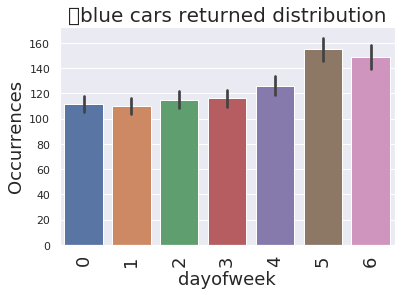

In [18]:
# Create a bar plot
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
autolibcopy_sum = autolibcopy['BlueCarsreturnedsum'].sum()
sns.set(style="darkgrid")
sns.barplot(autolibcopy['dayOfWeek'], autolibcopy['BlueCarsreturnedsum'], alpha=1.0)
plt.title('	blue cars returned distribution',fontsize=20)
plt.ylabel('Occurrences', fontsize=18)
plt.xlabel('dayofweek', fontsize=18)
plt.figsize=(40,150)
plt.xticks(rotation=90,fontsize=18)
plt.show()


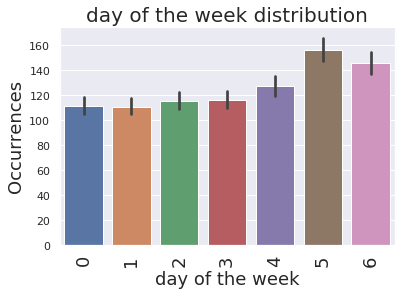

In [19]:
autolibcopy_sum = autolibcopy['BlueCarstakensum'].sum()
sns.set(style="darkgrid")
sns.barplot(autolibcopy['dayOfWeek'], autolibcopy['BlueCarstakensum'], alpha=1.0)
plt.title('day of the week distribution',fontsize=20)
plt.ylabel('Occurrences', fontsize=18)
plt.xlabel('day of the week', fontsize=18)
plt.figsize=(40,150)
plt.xticks(rotation=90,fontsize=18)
plt.show()

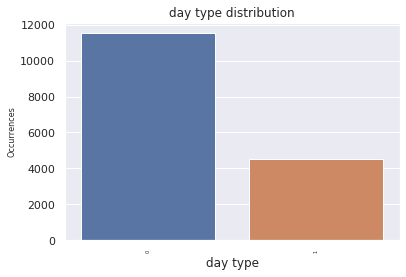

In [20]:
autolibcopy_count = autolibcopy['daytype'].value_counts()
sns.set(style="darkgrid")
sns.barplot(autolibcopy_count.index, autolibcopy_count.values, alpha=1.0)
plt.title('day type distribution',fontsize=12)
plt.ylabel('Occurrences', fontsize=8)
plt.xlabel('day type', fontsize=12)
plt.figsize=(20,80)
plt.xticks(rotation=90,fontsize=5)
plt.show()

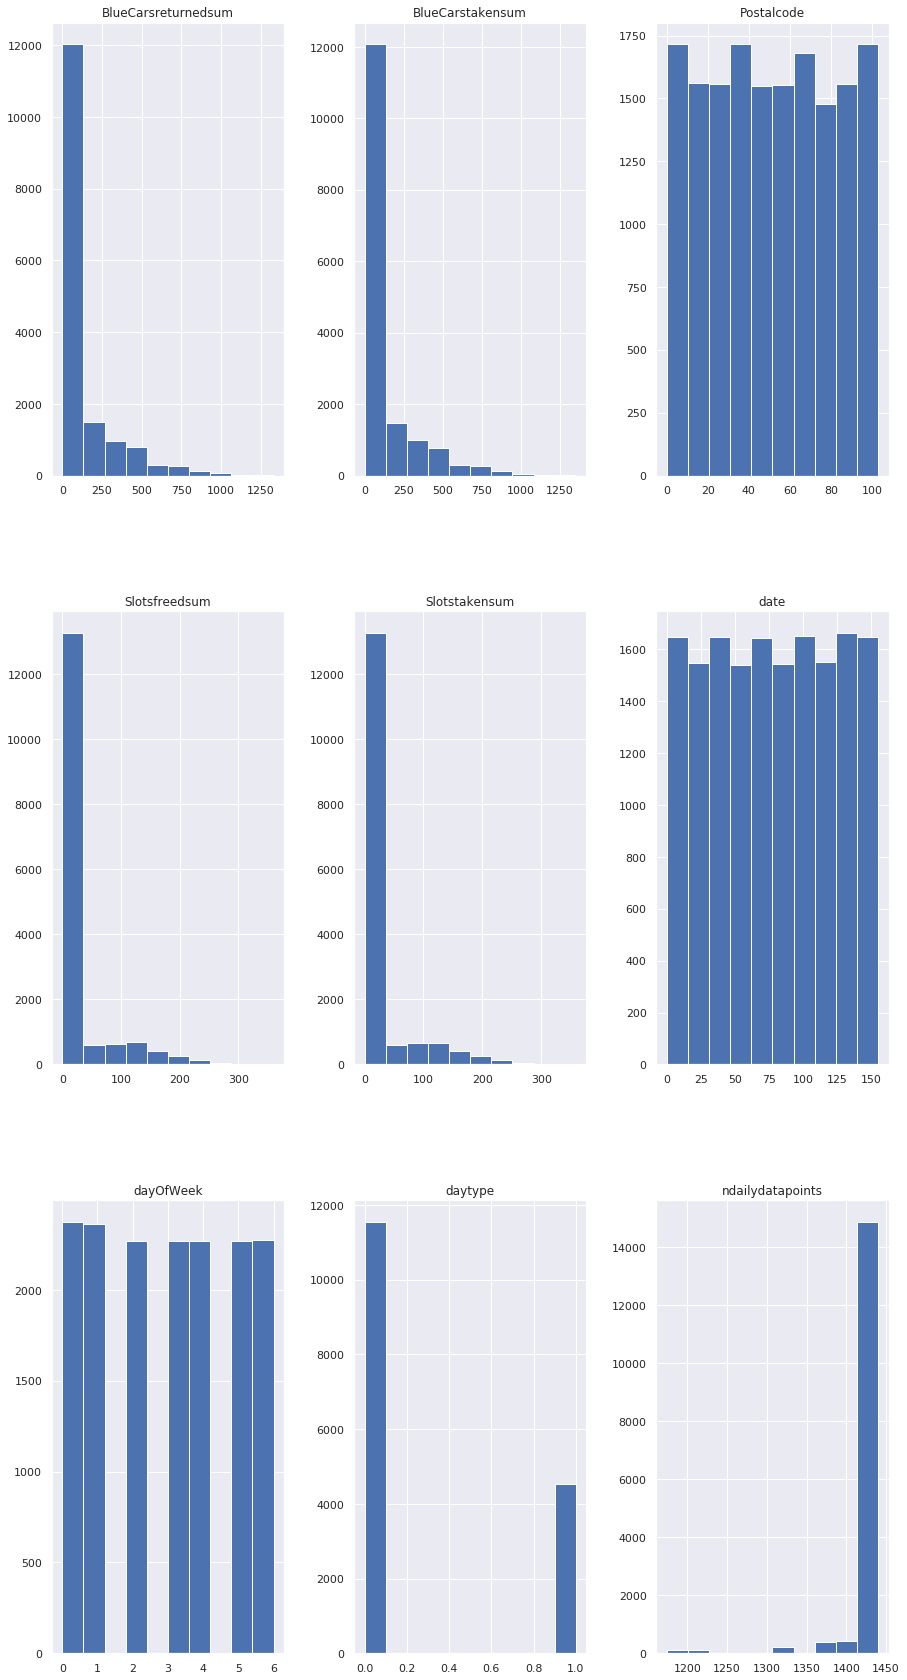

In [21]:
# Univariate Histograms
from matplotlib import pyplot
names = ['Postalcode','date','ndailydatapoints','dayOfWeek','daytype','BlueCarstakensum','BlueCarsreturnedsum','Slotsfreedsum','Slotstakensum']
autolibcopy.hist(figsize=(15,30))
pyplot.show()

## Bivariate and multivariate analysis

In [22]:
pp.ProfileReport(autolib)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,6
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,6


# Sampling

In [27]:
# determining the population shape

autolibcopy.shape

(16085, 9)

In [0]:
# determine the margin of error or confidence level which determines how close the sample results will be to the true value of the overall population in the study

margin of error = +/- 5%

# determine the confidence level which will meeasures your degree of certainty in regards to how well a sample represents the overall population within the chosen margin of error

because the margin of error = plus/minus 5, the confidence level = 95%

# setting the standard deviation so as to show teh variance in the dataset

because the datasetis skewed then the standard deviation will be set to .5 (50%)

# determine the z-score 

this will determine the number of standard deviations between any selected value & the mean of the population.

95% confidence => 1.96 z-score


In [0]:
# determining the sample size

Sample Size = [z2 * p(1-p)] / e2 / 1 + [z2 * p(1-p)] / e2 * N]
N = population size 
z = z-score 
e = margin of error 
p = standard deviation 
Sample Size = [2.582 * 0.5(1-0.5)] / 0.05 Squared / 1 + [2.582 * 0.5(1-0.5)] / 0.05 Squared * 16085] = [6.6564 * 0.25] / 0.0025 / 1 + [6.6564 * 0.25] / 40.2125] = 665 / 1.041 =638

In [23]:
# sample data

autolibcopy_sample = autolibcopy.sample(n = 638, replace="False")
print(autolibcopy_sample)
autolibcopy_sample

       Postalcode  date  ...  Slotsfreedsum  Slotstakensum
4345           27   128  ...              0              0
9390           60    39  ...              0              0
1421            9     9  ...             52             52
6736           43    31  ...              1              1
13938          90    52  ...              2              3
...           ...   ...  ...            ...            ...
12540          81    33  ...              0              0
8230           52   124  ...              0              0
3424           21   140  ...              3              2
15356          99    44  ...              0              0
3285           21     1  ...              1              1

[638 rows x 9 columns]


,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Slotsfreedsum,Slotstakensum
4345,27,128,1439,1,0,5,6,0,0
9390,60,39,1440,5,1,144,143,0,0
1421,9,9,1439,3,0,280,281,52,52
6736,43,31,1440,3,0,65,65,1,1
13938,90,52,1439,1,0,15,20,2,3
...,...,...,...,...,...,...,...,...,...
12540,81,33,1440,6,1,23,17,0,0
8230,52,124,1440,4,0,17,22,0,0
3424,21,140,1439,1,0,23,18,3,2
15356,99,44,1440,2,0,31,27,0,0


In [24]:
# sample stats through the use of pandas profiling

pp.ProfileReport(autolibcopy_sample)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,10
Number of observations,638
Total Missing (%),0.0%
Total size in memory,50.0 KiB
Average record size in memory,80.2 B
Numeric,5
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,4
